### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting time-series data & markdown comments on data points selection
#### 3. Line chart and time series analysis: decomposition
#### 4. Dickey-Fuller test for stationarity & results interpretation
#### 5. Stationarizing: differencing
#### 6. Check for autocorrelations

### 1. Importing libraries and data

In [1]:
# Import libraries.

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api to import the public access version of statsmodels.
import os
import warnings # Library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings.

plt.style.use('fivethirtyeight') # Styling option for how plots will appear.

In [2]:
# Define path.

path = r'C:\Users\danie\Desktop\CareerFoundry\Achievement 6-Personal Project'
path

'C:\\Users\\danie\\Desktop\\CareerFoundry\\Achievement 6-Personal Project'

In [3]:
# Import data.

df = pd.read_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'Rats_Data_Cleaned_4.csv'))

### 2. Subsetting time-series data & markdown comments on data points selection

In [4]:
# Examine dataframe.

df.head()

,Unnamed: 0,INSPECTION_TYPE,JOB_PROGRESS,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,NEIGHBORHOOD,inspection_year,inspection_month
0,0,Initial,1,2,10451.0,40.826932,-73.925286,Bronx,2016-09-26 13:10:25,Passed,"(40.826932154585, -73.925286438191)",4.0,16.0,6301.0,Concourse-Concourse Village,2016,9
1,1,Initial,1,2,10457.0,40.845931,-73.896556,Bronx,2016-11-29 16:07:06,Passed,"(40.845930919837, -73.896555813219)",6.0,15.0,395.0,Tremont,2016,11
2,2,Initial,1,1,10031.0,40.822391,-73.946768,Manhattan,2014-09-03 10:12:14,Passed,"(40.822390591115, -73.946767934183)",9.0,9.0,227.0,Hamilton Heights-Sugar Hill,2014,9
3,3,Initial,1,2,10458.0,40.873780,-73.885892,Bronx,2023-02-02 14:50:46,Passed,"(40.873779859166, -73.885892352785)",7.0,11.0,413.0,Bedford Park,2023,2
4,4,Initial,1,1,10009.0,40.728739,-73.981585,Manhattan,2019-04-04 09:57:25,Passed,"(40.728739451411, -73.98158466403)",3.0,2.0,34.0,East Village,2019,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908367 entries, 0 to 1908366
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   INSPECTION_TYPE   object 
 2   JOB_PROGRESS      int64  
 3   BORO_CODE         int64  
 4   ZIP_CODE          float64
 5   LATITUDE          float64
 6   LONGITUDE         float64
 7   BOROUGH           object 
 8   INSPECTION_DATE   object 
 9   RESULT            object 
 10  LOCATION          object 
 11  COMMUNITY BOARD   float64
 12  COUNCIL DISTRICT  float64
 13  CENSUS TRACT      float64
 14  NEIGHBORHOOD      object 
 15  inspection_year   int64  
 16  inspection_month  int64  
dtypes: float64(6), int64(5), object(6)
memory usage: 247.5+ MB


In [6]:
# Reset index so that you can use the "Date" column as a filter

df = df.reset_index()

In [7]:
# Find number of rat inspections for "year" variable.

df['inspection_year'].value_counts(dropna = False)

inspection_year
2018    241754
2019    237148
2017    235447
2016    170422
2012    165551
2011    149935
2010    149004
2015    128677
2014    128428
2013    127210
2022     48890
2023     42784
2021     34117
2020     25789
2009     19271
2024      3910
2001        13
2003         5
2002         5
2008         4
2000         2
2007         1
Name: count, dtype: int64

In [8]:
# Convert "year" value_counts to output to dataframe.

data_sub = df['inspection_year'].value_counts().reset_index().rename(columns={"index": "value", 0: "result count"})
data_sub

,inspection_year,count
0,2018,241754
1,2019,237148
2,2017,235447
3,2016,170422
4,2012,165551
5,2011,149935
6,2010,149004
7,2015,128677
8,2014,128428
9,2013,127210


In [14]:
# Create second subset dataframe to convert inspection_year to datetime.

data_sub_1 = data_sub

In [15]:
# Check output.

data_sub_1

,inspection_year,count
0,2018,241754
1,2019,237148
2,2017,235447
3,2016,170422
4,2012,165551
5,2011,149935
6,2010,149004
7,2015,128677
8,2014,128428
9,2013,127210


In [16]:
# Convert year variable to datetime.

data_sub_1['inspection_year'] = pd.to_datetime(data_sub_1['inspection_year'], format='%Y')

In [18]:
# Check datatype conversion.

data_sub_1['inspection_year'].dtype

dtype('<M8[ns]')

In [19]:
# Set the "year" column as the index

from datetime import datetime

data_sub_1['datetime'] = pd.to_datetime(data_sub_1['inspection_year']) # Create a datetime column from "Date.""
data_sub_1 = data_sub_1.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub_1.drop(['inspection_year'], axis=1, inplace=True) # Drop the "Date" column.
data_sub_1.head()

,count
datetime,
2018-01-01,241754
2019-01-01,237148
2017-01-01,235447
2016-01-01,170422
2012-01-01,165551


In [20]:
# Sort index values to chronological.

data_sub_1.sort_index(inplace=True)

In [21]:
# Check output.

data_sub_1

,count
datetime,
2000-01-01,2
2001-01-01,13
2002-01-01,5
2003-01-01,5
2007-01-01,1
2008-01-01,4
2009-01-01,19271
2010-01-01,149004
2011-01-01,149935


In [22]:
# Check for missing values.

data_sub_1.isnull().sum() 

count    0
dtype: int64

I selected to subset the data points "year" and counts for each year from the original rat dataset. (I previously merged the rat dataset with a second dataset containing financial/condo rental information, but the resulting merged dataset did not contain any inspections in 2022, i.e. none of the 2022 rat inspections had BBL codes included in the financial/condo data set.) In the original dataset, each row is a single inspection, so some locations have multiple rows if they failed and subsequently repeated inspections for compliance purposes. I initially subset with the datetime variable "INSPECTION_DATE," but the granularity of the format (%y%m%d %H%M%S) led to an indecipherable plot. I ultimately settled on counts for the number of inspections that occurred each year, which provides a big picture of how many inspections occurred overall and also avoids the issue of potential duplicates.

### 3. Line chart and time series analysis: decomposition

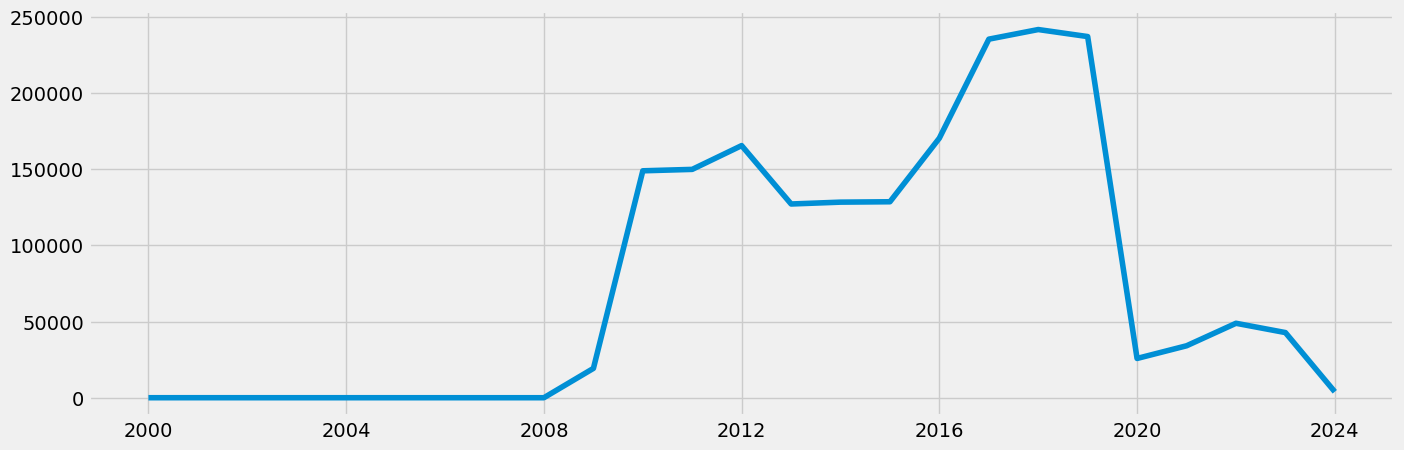

In [25]:
# Plot the new data set.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub_1)

The coronavirus pandemic in 2020 obviously impacted the number of rat inspections that occurred since New York City was especially affected by the virus and quarantine measures severely limited the department's ability to conduct on-site inspections. The number of inspections reported significantly increased after 2008 and peaked in 2018.

In [37]:
# Decompose the time series using an additive model.

decomposition = sm.tsa.seasonal_decompose(data_sub_1, model='additive', extrapolate_trend='freq', period=1)

In [39]:
# Define a fixed size for all special charts.

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

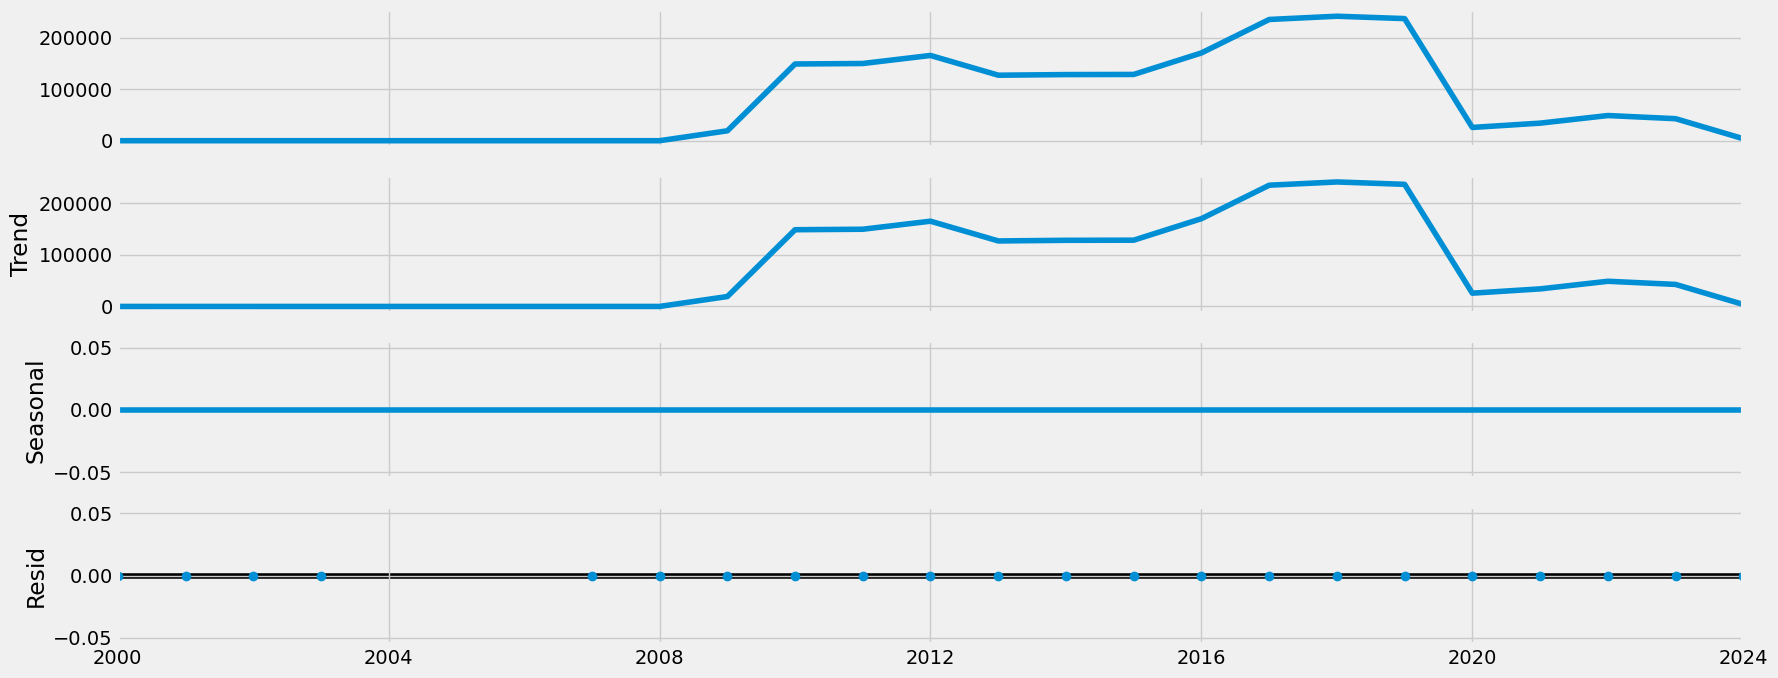

In [40]:
# Plot the separate components.

decomposition.plot()
plt.show()

The level and underlying trend appear the same, indicating that the data does not have much residual noise and doesn't need to be smoothed. The seasonality appears to be flat, indicating there is no seasonality in the number of rat inspections that occur each year.

### 4. Dickey-Fuller test for stationarity & results interpretation

##### Null hypothesis: The dataset has a unit root and is therefore non-stationary.

##### Alternative hypothesis: The dataset does not have a unit root and is therefore stationary and can be used to forecast.

In [41]:
# Import the adfuller() function and define a function that prints the correct output from the adfuller() array.

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function.
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series.
dickey_fuller(data_sub_1['count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -5.492952
p-value                         0.000002
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


The test statistic (-5.49) is less than any of the critical values in the stationarity test, so the above null hypothesis that the dataset is non-stationary can be disproved, meaning the dataset can be used for forecasting.

I wanted to get some practice with stationarizing data, so despite these results, I conducted a round of differencing below.

### 5. Stationarizing: differencing

In [116]:
# Conduct a round of differencing.

data_diff = data_sub_1 - data_sub_1.shift(1)

In [117]:
# Remove missing values that result from differencing.

data_diff.dropna(inplace = True)

In [118]:
# Check data_diff output.

data_diff

,count
datetime,
2001-01-01,11.0
2002-01-01,-8.0
2003-01-01,0.0
2007-01-01,-4.0
2008-01-01,3.0
2009-01-01,19267.0
2010-01-01,129733.0
2011-01-01,931.0
2012-01-01,15616.0


In [119]:
data_diff.columns

Index(['count'], dtype='object')

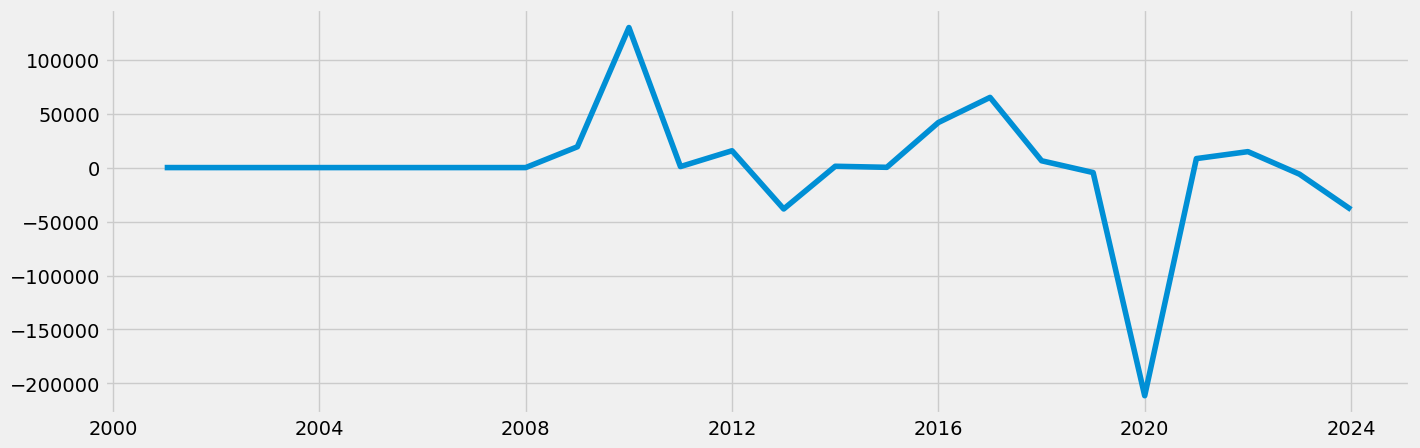

In [120]:
# Examine what the differencing did to the time-series curve.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [121]:
# Rerun Dickey-Fuller test.

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  1.445135
p-value                         0.997310
Number of Lags Used             8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


### 6. Check for autocorrelations

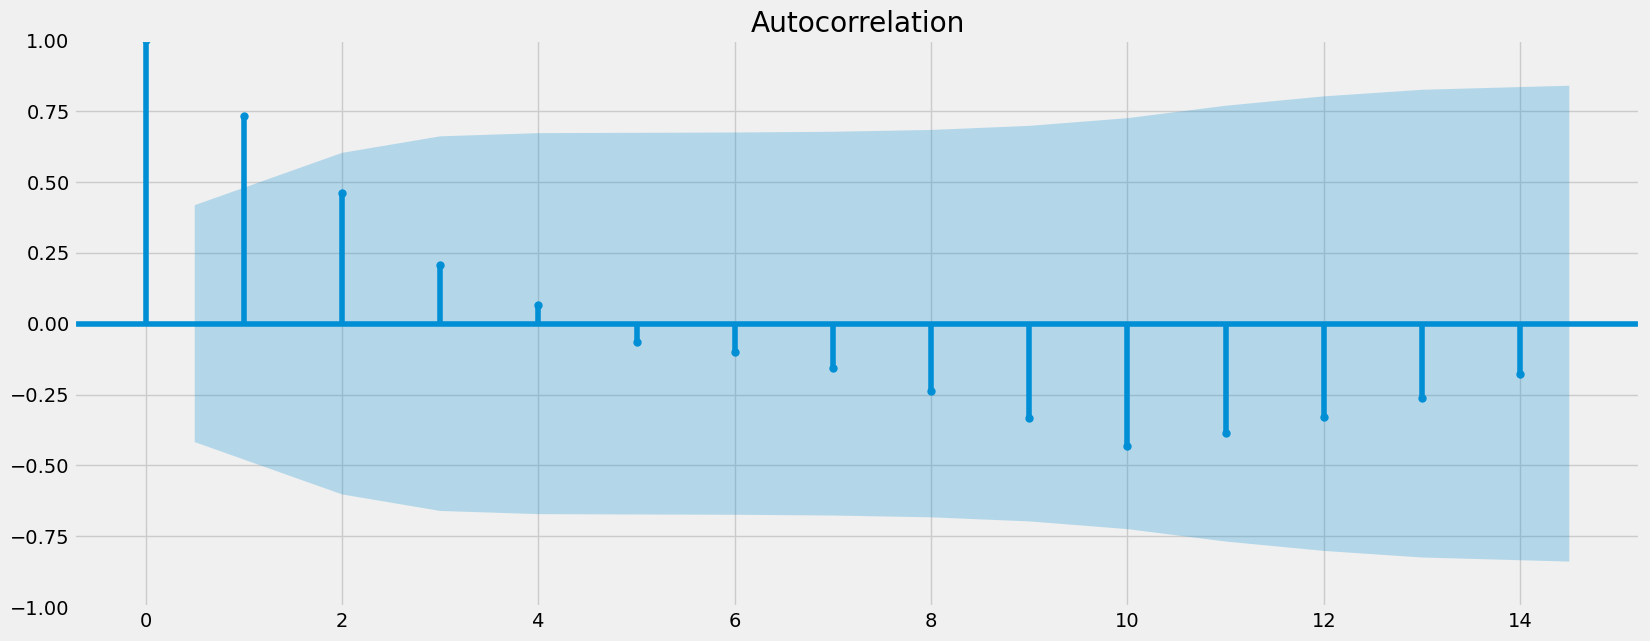

In [122]:
# Import the autocorrelation and partial correlation plots and plot autocorrelations.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub_1)
plt.show()